# K Nearest Neighbors (KNN)

In this notebook, we implement *K Nearest Neighbors (KNN)* to classify iris species using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

We firstly plot the overall scatter points between any 2 feature measures to determine our predictors. 

Next, to implement KNN, we define the following functions:

* **distance**: to calculate the Euclidean distance between two points
* **k_nearest_neighbors**: to find the k nearest points
* **KNN_Predict**: to predict the majority label of the k closest points for classification (regression == False) or to predict the average label for the K closest points for regression (regreesion == True)
* **classification_error**: to calculate classification error

Also, we derive a plot between error rate and K, and then choose the K with minimun error rate.

At the end of this notebook, we also used the KNeighborsClassifier function in sklearn package to validate our algorithm.


### Task

Our task will be to classify setosa, versicolor, and virginica species using two feature measures. In order to do this we will need the following libraries:

* [matplotlib](http://metplotlib.org)
* [pandas](http://pandas.pydata.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [itertools](https://docs.python.org/3/library/itertools.html)
* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) in [sklearn](https://scikit-learn.org/stable/index.html)

The iris data is loaded from [sklearn.dataset](https://scikit-learn.org/stable/modules/classes.html?highlight=dataset#module-sklearn.datasets).

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.neighbors import KNeighborsClassifier

# Import datasets from sklearn which contains the iris data
from sklearn.datasets import load_iris

In [2]:
# Load the iris data (specifying type as data frames)
iris = load_iris(as_frame = True)

In [3]:
# Get pairwise features list of the dataset
L = list(x for x in combinations(iris['data'].columns, 2))

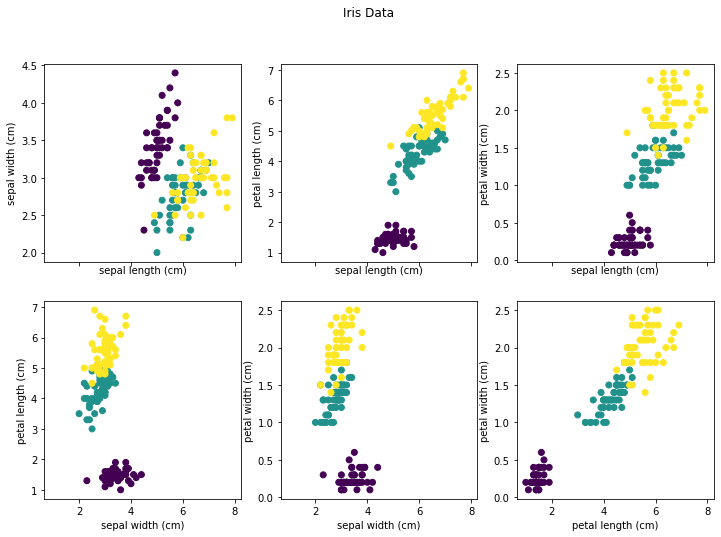

In [4]:
# Plot an overall scatter points between any 2 feature measures
fig, ax = plt.subplots(nrows = 2, 
                       ncols = 3,
                      sharex = True,
                      figsize = (12, 8))

for p, q in zip(L, [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]):
    ax[q[0], q[1]].scatter(iris['data'][p[0]],
                          iris['data'][p[1]],
                          c = iris['target'])
    ax[q[0], q[1]].set_xlabel(p[0])
    ax[q[0], q[1]].set_ylabel(p[1])

fig.suptitle('Iris Data')
plt.show()

**Interpret**: From the above scatter plots, the last plot, petal length (cm) vs. petal width (cm) seem to fully seperate the three classes. And thus, we **choose petal length (cm) and petal width (cm) as our features** to predict the classification of iris species.

---

In [5]:
# Extract out desired features from iris, and covert features to numpy array
X = iris['data'][['petal length (cm)',
                 'petal width (cm)']].to_numpy()

# Extract out labels, and convert labels to numpy array
y = iris['target'].to_numpy()

In [6]:
# Train / Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.33,
                                                   random_state = 42) # like seed in R

---

**Define the functions for KNN algorithm:**

In [7]:
# Calculate the Euclidean distance between two points
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

In [8]:
# Find the k nearest points
def k_nearest_neighbors(point,
                        training_features,
                        training_labels,
                       k):
    neighbors = []
    # Calculate all the distance between the predict point and training data points
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
    # Sort the distances from smallest to the largest    
    neighbors.sort(key = lambda x :x[-1])
    
    # Output the first K points with the smallest distances
    return neighbors[:k]

In [9]:
# Count the labels and predict
def KNN_Predict(point,
                training_features,
                training_labels,
                k,
                regression = False):
    # Find the k nearest points
    neighbors = k_nearest_neighbors(point,
                                    training_features,
                                    training_labels,
                                    k)
    
    # for classification, output the majority label of the k closest points   
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    # for regression, output the average label for the K closest points
    else:
        return sum([x[1] for x in neighbors])/k

In [10]:
# Calculate the error for classification
def classification_error(test_features,
                         test_labels,
                         training_features,
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        if test_labels[i] != KNN_Predict(point,
                                               training_features,
                                               training_labels,
                                               k):
            error += 1
            
    return error/len(test_labels)

---

**Implement the algorithm:**

In [11]:
# Set a list of k values to
possible_k = [x for x in range(3, 26, 2)]
# Calculate the error rates for every k values
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train,
                               k) for k in possible_k]

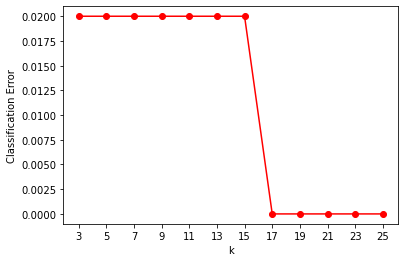

In [12]:
# Derive a plot between error rate and K
plt.plot(possible_k, errors, color = 'red')
plt.scatter(possible_k, errors, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error')
plt.xticks(possible_k)
plt.show()

**Interpret**: From the curve above, k = 17 should be the best value. However, the number of data points in this dataset is relatively low, and k = 17 might be too large in this situation. And thus, we choose k = 9 as our best k value.

In [13]:
# Implement our KNN algorithm for classification in the test dataset
predicted_labels = [KNN_Predict(point,
                                X_train,
                                y_train,
                                9) for point in X_test]

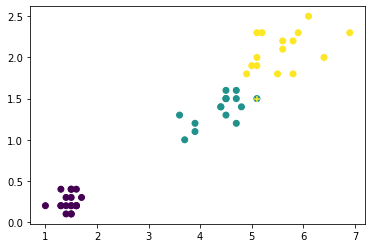

In [14]:
# Plot the predicted labels (circle points) and the provided true labels (marked '+') together to assess our algorithm
plt.scatter(X_test[:, 0], X_test[:, 1], c = predicted_labels)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, marker = '+')

**Try for the regression:**

In [15]:
# Extract out desired features from iris, and covert features to numpy array
X = iris['data'][['petal length (cm)',
                 'petal width (cm)']].to_numpy() 
# Extract out labels, and convert labels to numpy array
y = iris['data']['sepal length (cm)'].to_numpy()

In [16]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.33,
                                                   random_state = 42)

In [17]:
# Implement our KNN algorithm for regression in the test dataset
predicted_labels = [KNN_Predict(point,
                                X_train,
                                y_train,
                                3,
                               regression = True) for point in X_test]

In [18]:
# Calculate the error
np.sqrt((y_test - predicted_labels) @ (y_test - predicted_labels))

2.977321689781683

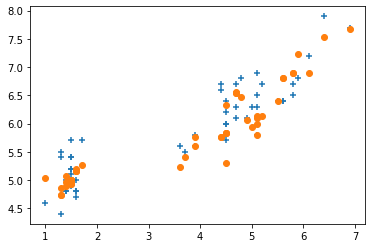

In [19]:
# Plot the predicted labels (circle points) and the provided labels (marked '+') together to assess our algorithm
plt.scatter(X_test[:, 0], y_test, marker = '+')
plt.scatter(X_test[:, 0], predicted_labels)

---

**Finally, we also use the *KNeighborsClassifier* in sklearn to perform KNN algorithm:**

In [20]:
# Extract out desired features from iris, and covert features to numpy array
X = iris['data'][['petal length (cm)',
                 'petal width (cm)']].to_numpy()
# Extract out labels, and convert labels to numpy array
y = iris['target'].to_numpy()

# Train / Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.33,
                                                   random_state = 42) # like seed in R

In [21]:
# Implement KNeighborsClassifier in sklearn
neigh = KNeighborsClassifier(n_neighbors = 9)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [22]:
# Output the result
neigh.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [23]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

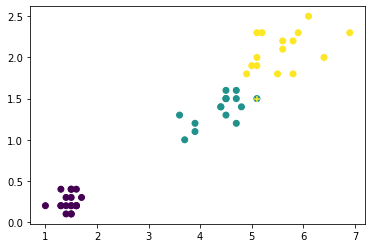

In [24]:
# Plot the predicted labels (circle points) and the provided labels (marked '+') together to compare the results
plt.scatter(X_test[:, 0], X_test[:, 1], c = neigh.predict(X_test))
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, marker = '+')

**Interpret**: From the above plot, the results of the sklearn function is the same as the algorithm we code previously. And thus, our algorithm works well.